In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
from sklearn.preprocessing import LabelEncoder

In [121]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [8]:
df=pd.read_csv("customer_booking.csv",encoding='latin-1')


In [9]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [10]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [12]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:
df.shape

(50000, 14)

In [14]:
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [15]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [16]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


<Axes: xlabel='booking_complete', ylabel='count'>

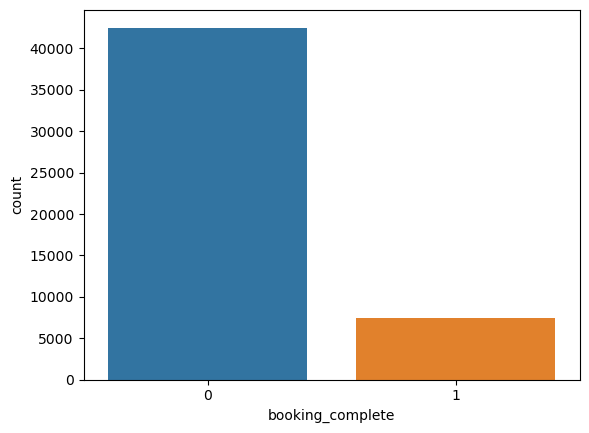

In [17]:
sns.countplot(x=df['booking_complete'])

<Axes: xlabel='booking_complete', ylabel='count'>

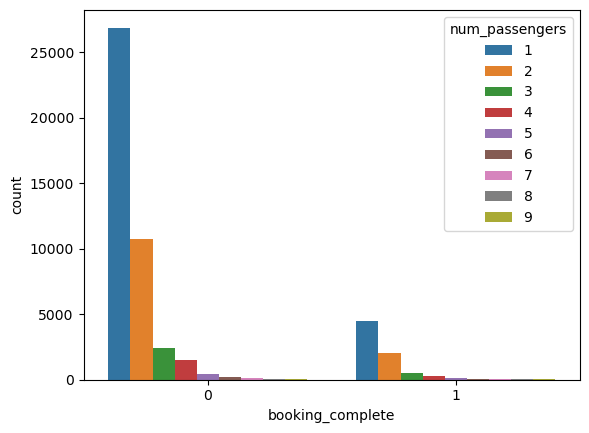

In [18]:
sns.countplot(x=df['booking_complete'],hue=df['num_passengers'])

<Axes: xlabel='booking_complete', ylabel='count'>

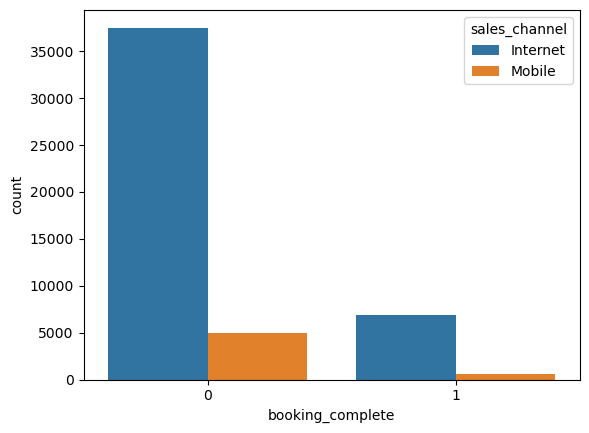

In [19]:
sns.countplot(x=df['booking_complete'],hue=df['sales_channel'])

<Axes: xlabel='booking_complete', ylabel='count'>

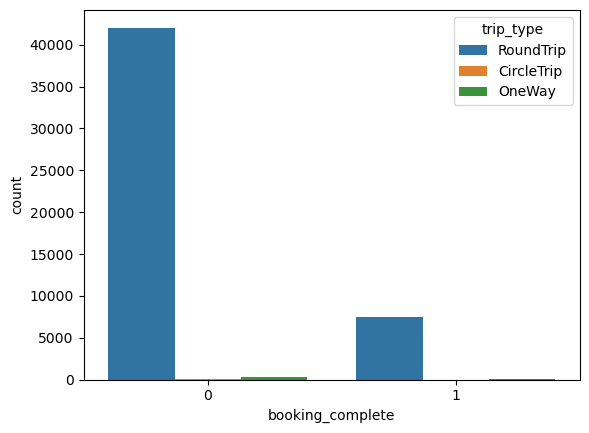

In [20]:
sns.countplot(x=df['booking_complete'],hue=df['trip_type'])

<Axes: xlabel='booking_complete', ylabel='count'>

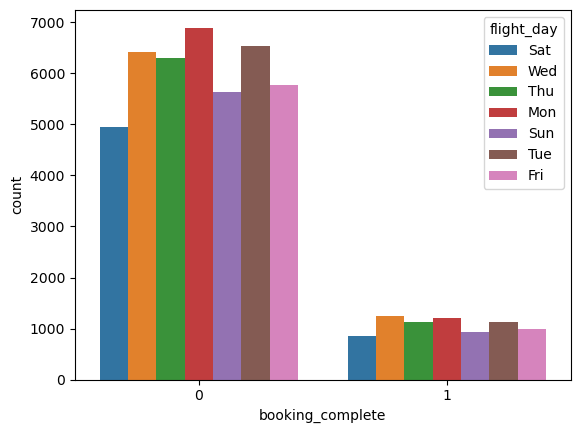

In [21]:
sns.countplot(x=df['booking_complete'],hue=df['flight_day'])

<Axes: xlabel='booking_complete', ylabel='count'>

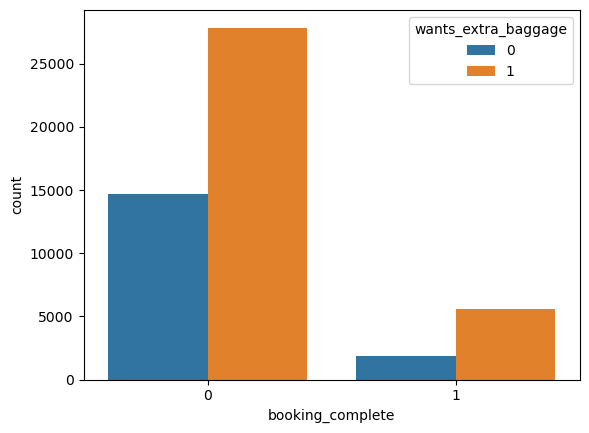

In [22]:
sns.countplot(x=df['booking_complete'],hue=df['wants_extra_baggage'])

<Axes: xlabel='booking_complete', ylabel='count'>

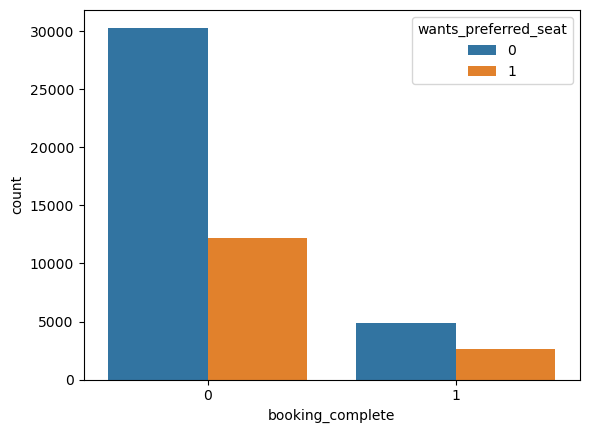

In [23]:
sns.countplot(x=df['booking_complete'],hue=df['wants_preferred_seat'])

<Axes: xlabel='booking_complete', ylabel='count'>

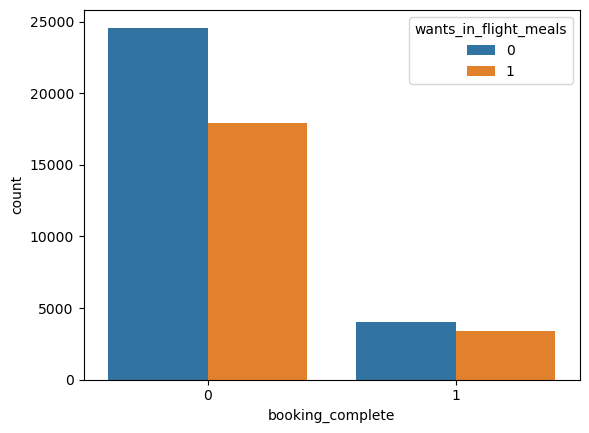

In [24]:
sns.countplot(x=df['booking_complete'],hue=df['wants_in_flight_meals'])

In [25]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


<Axes: xlabel='booking_complete', ylabel='flight_duration'>

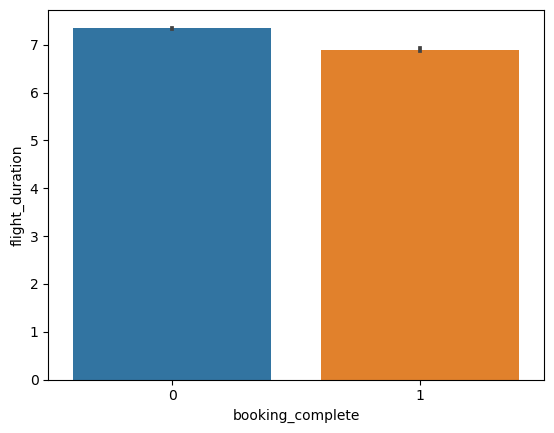

In [26]:
sns.barplot(x=df['booking_complete'],y=df['flight_duration'])

<Axes: xlabel='booking_complete', ylabel='flight_hour'>

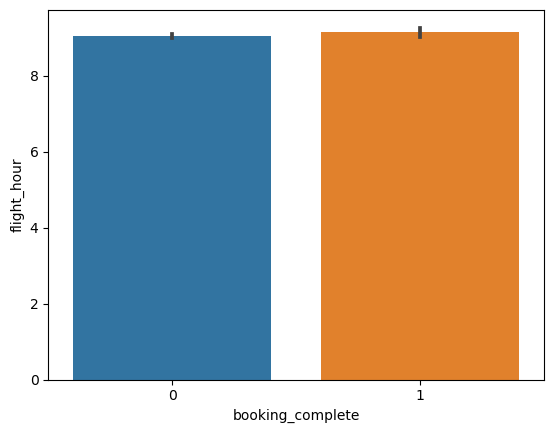

In [27]:
sns.barplot(x=df['booking_complete'],y=df['flight_hour'])

<Axes: xlabel='booking_complete', ylabel='length_of_stay'>

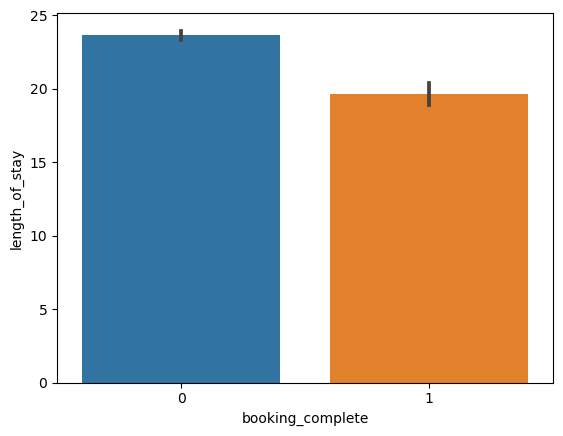

In [28]:
sns.barplot(x=df['booking_complete'],y=df['length_of_stay'])

<Axes: xlabel='booking_complete', ylabel='purchase_lead'>

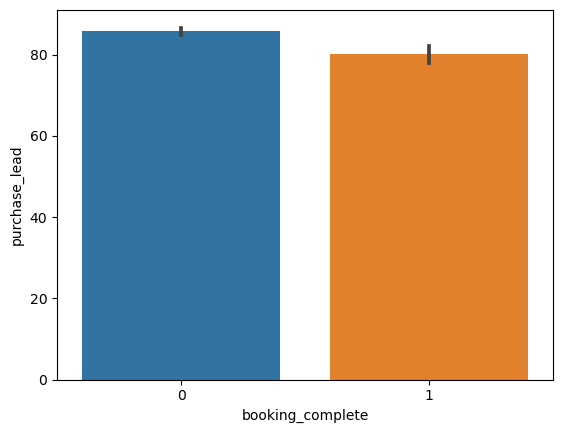

In [29]:

sns.barplot(x=df['booking_complete'],y=df['purchase_lead'])

In [30]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


<Axes: xlabel='booking_complete', ylabel='flight_duration'>

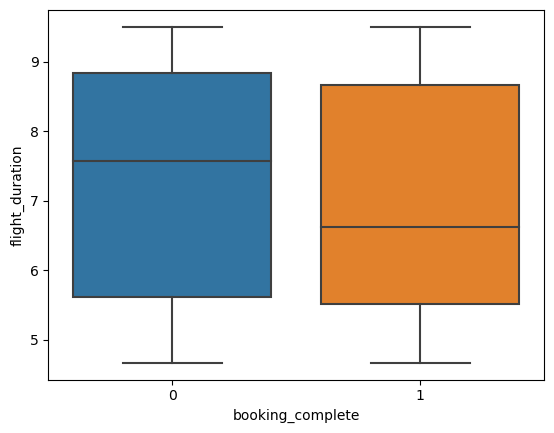

In [31]:
sns.boxplot(data=df,x='booking_complete',y='flight_duration')

<Axes: xlabel='booking_complete', ylabel='length_of_stay'>

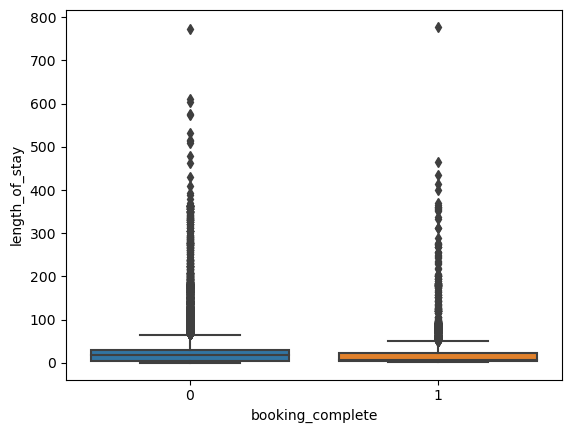

In [32]:
sns.boxplot(data=df,x='booking_complete',y='length_of_stay')

<Axes: xlabel='booking_complete', ylabel='flight_hour'>

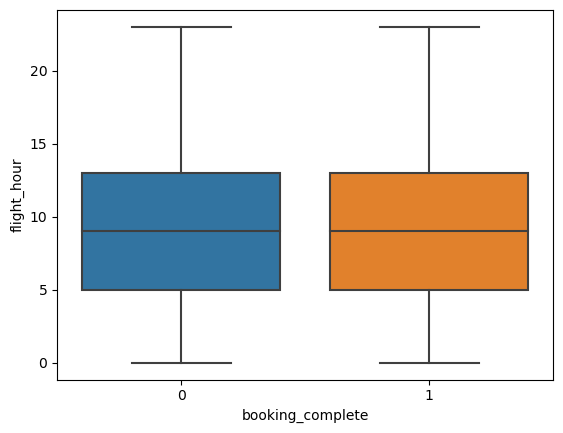

In [33]:
sns.boxplot(data=df,x='booking_complete',y='flight_hour')

<Axes: xlabel='booking_complete', ylabel='num_passengers'>

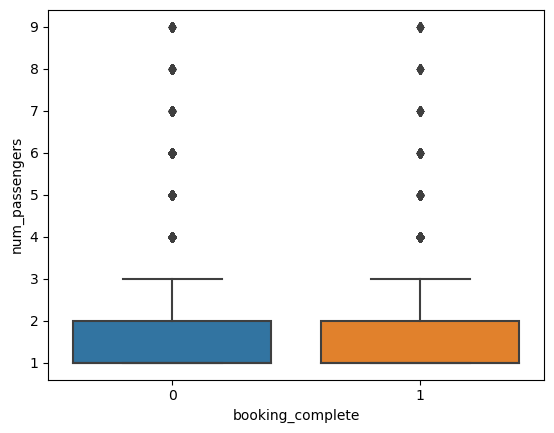

In [34]:
sns.boxplot(data=df,x='booking_complete',y='num_passengers')

<Axes: xlabel='booking_complete', ylabel='purchase_lead'>

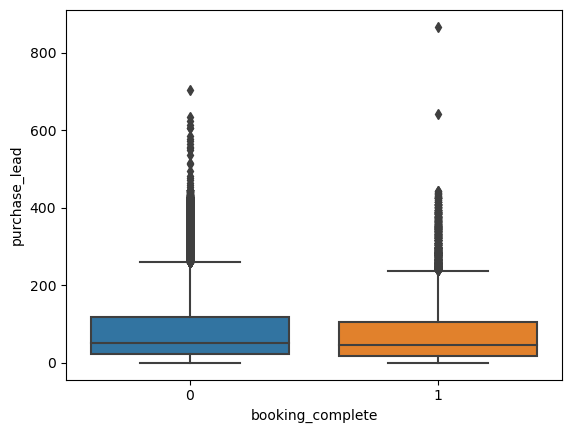

In [35]:
sns.boxplot(data=df,x='booking_complete',y='purchase_lead')

<Axes: xlabel='booking_complete', ylabel='flight_duration'>

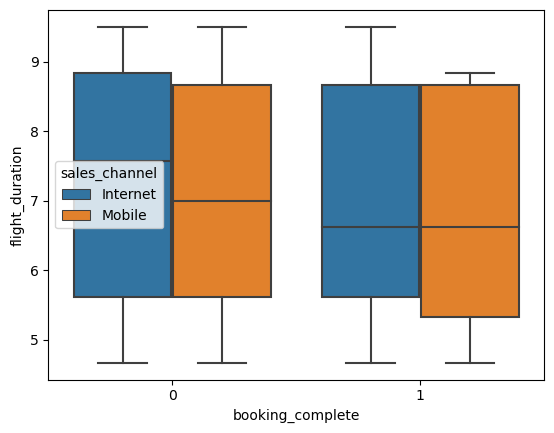

In [36]:
sns.boxplot(data=df,x='booking_complete',y='flight_duration',hue='sales_channel')

<Axes: xlabel='booking_complete', ylabel='length_of_stay'>

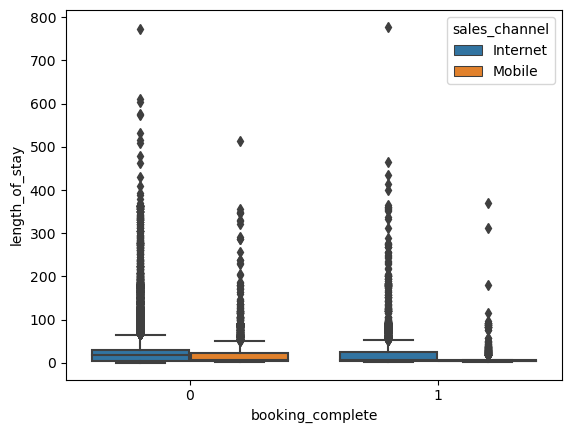

In [37]:
sns.boxplot(data=df,x='booking_complete',y='length_of_stay',hue='sales_channel')

<Axes: xlabel='booking_complete', ylabel='flight_hour'>

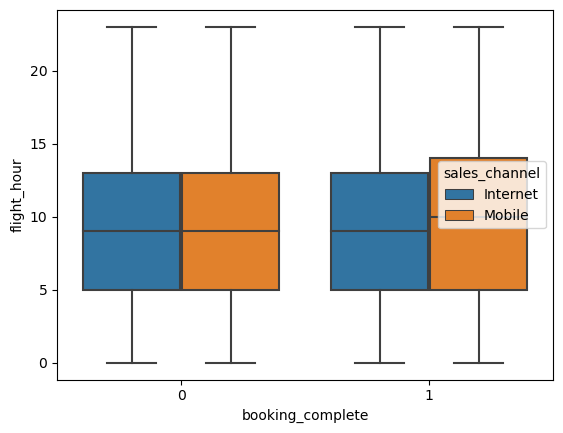

In [38]:
sns.boxplot(data=df,x='booking_complete',y='flight_hour',hue='sales_channel')

<Axes: xlabel='booking_complete', ylabel='purchase_lead'>

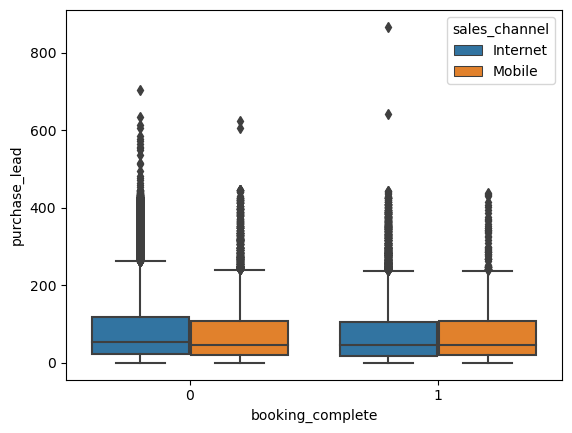

In [39]:
sns.boxplot(data=df,x='booking_complete',y='purchase_lead',hue='sales_channel')

<Axes: xlabel='booking_complete', ylabel='num_passengers'>

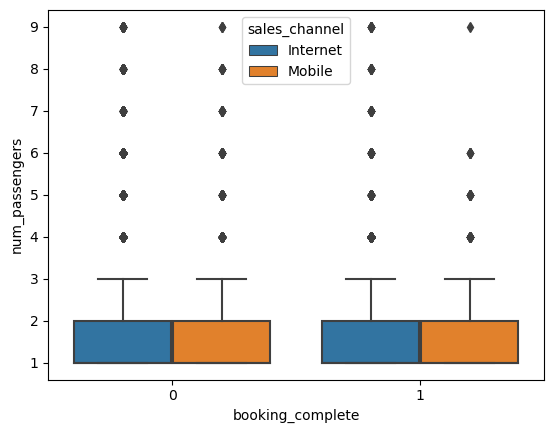

In [40]:
sns.boxplot(data=df,x='booking_complete',y='num_passengers',hue='sales_channel')

In [41]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


<Axes: >

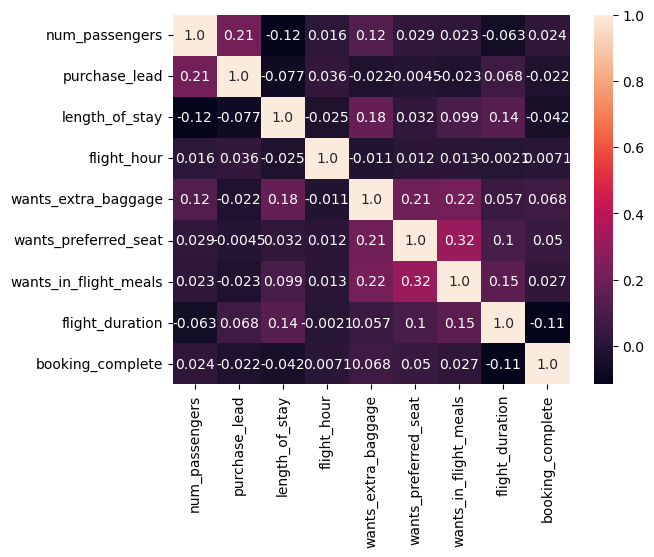

In [42]:
numeric_col=df.select_dtypes(include=[np.number])
sns.heatmap(numeric_col.corr(),annot=True,fmt="1.2")

In [43]:
label_df=df['booking_origin'].value_counts()[:10].index

In [44]:
val_df=df['booking_origin'].value_counts()[:10].values

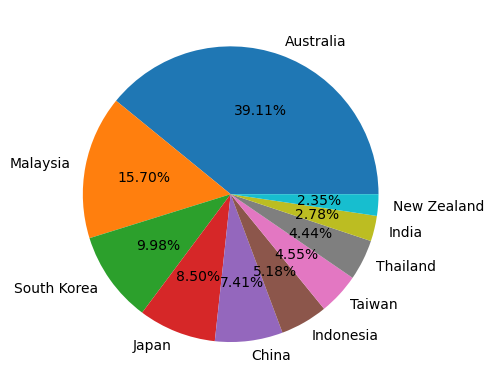

In [45]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [46]:
label_df=df['flight_day'].value_counts().index

In [47]:
val_df=df['flight_day'].value_counts().values

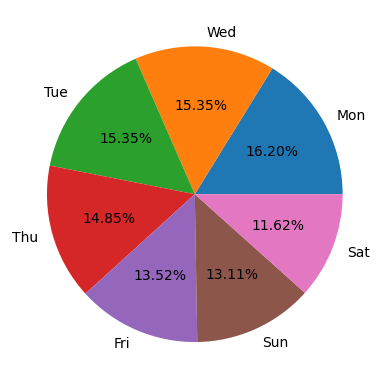

In [48]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [49]:
label_df=df['sales_channel'].value_counts().index

In [50]:
val_df=df['sales_channel'].value_counts().values

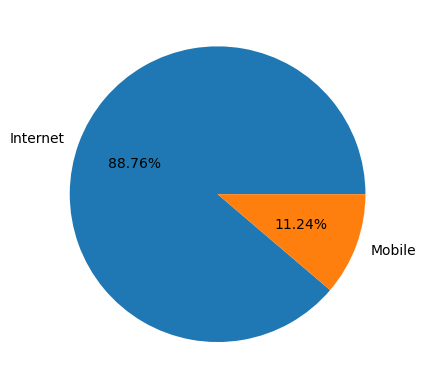

In [51]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [52]:
label_df=df['trip_type'].value_counts().index

In [53]:
val_df=df['trip_type'].value_counts().values

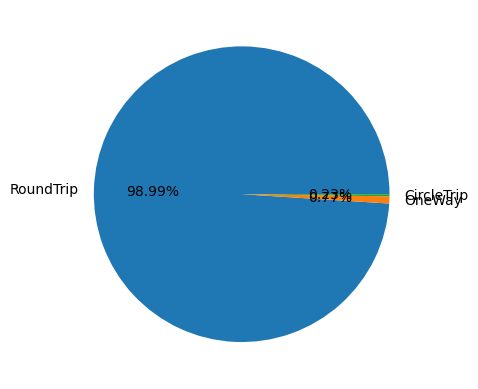

In [54]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [55]:
label_df=df['route'].value_counts()[:10].index

In [56]:
val_df=df['route'].value_counts()[:10].values

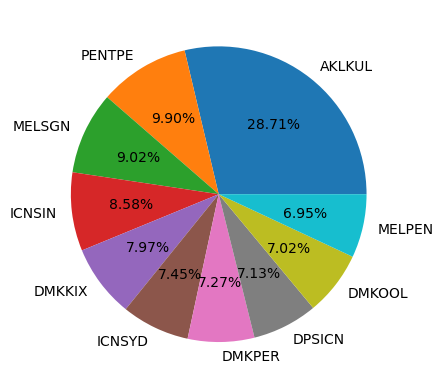

In [57]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [58]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [59]:
label_df=df.groupby("trip_type")['flight_hour'].mean().index


In [60]:
val_df=df.groupby("trip_type")['flight_hour'].mean().values

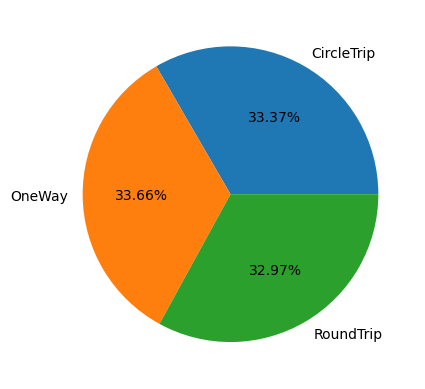

In [61]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [62]:
label_df=df.groupby("trip_type")['flight_duration'].mean().index


In [63]:
val_df=df.groupby("trip_type")['flight_duration'].mean().values

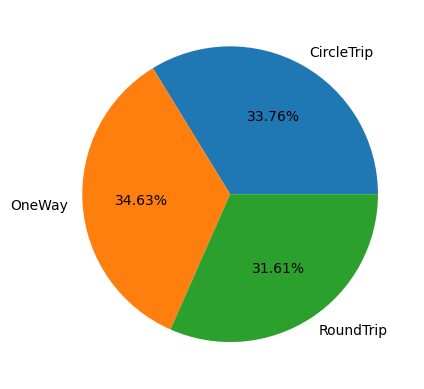

In [64]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [65]:
label_df=df.groupby("trip_type")['length_of_stay'].mean().index


In [66]:
val_df=df.groupby("trip_type")['length_of_stay'].mean().values

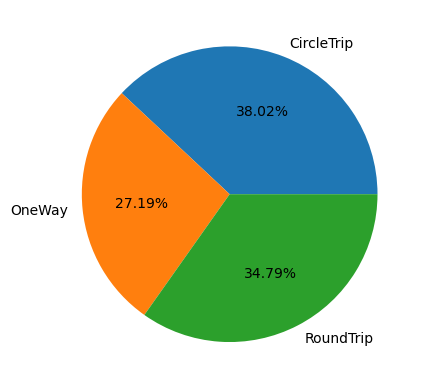

In [67]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [68]:
label_df=df.groupby("trip_type")['purchase_lead'].mean().index


In [69]:
val_df=df.groupby("trip_type")['purchase_lead'].mean().values

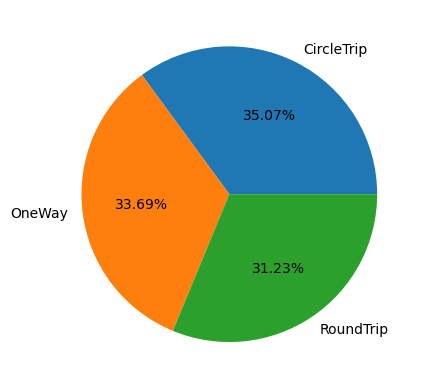

In [70]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [71]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [72]:
label_df=df.groupby("sales_channel")['purchase_lead'].mean().index


In [73]:
val_df=df.groupby("sales_channel")['purchase_lead'].mean().values

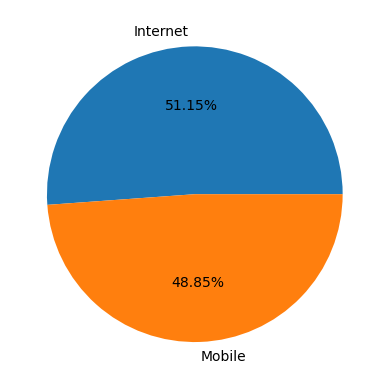

In [74]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [75]:
label_df=df.groupby("sales_channel")['length_of_stay'].mean().index


In [76]:
val_df=df.groupby("sales_channel")['length_of_stay'].mean().values

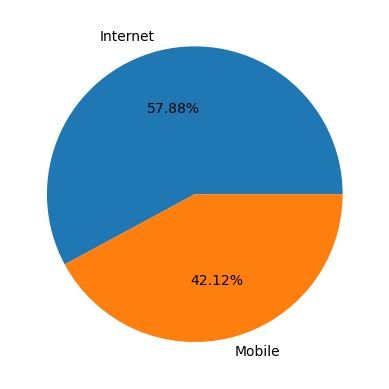

In [77]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [78]:
label_df=df.groupby("sales_channel")['flight_duration'].mean().index


In [79]:
val_df=df.groupby("sales_channel")['flight_duration'].mean().values

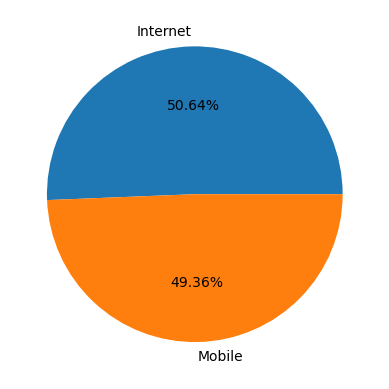

In [80]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [81]:
label_df=df.groupby("sales_channel")['flight_hour'].mean().index


In [82]:
val_df=df.groupby("sales_channel")['flight_hour'].mean().values

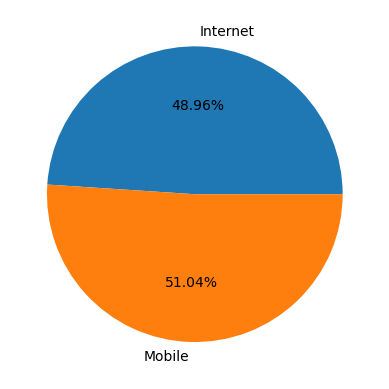

In [83]:
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [84]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


C:\Users\himan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\h

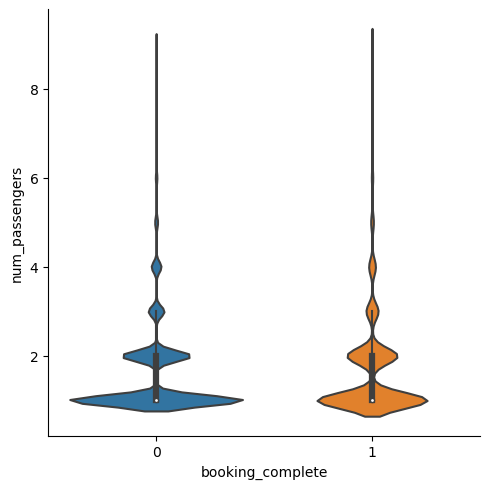

<Figure size 1500x1000 with 0 Axes>

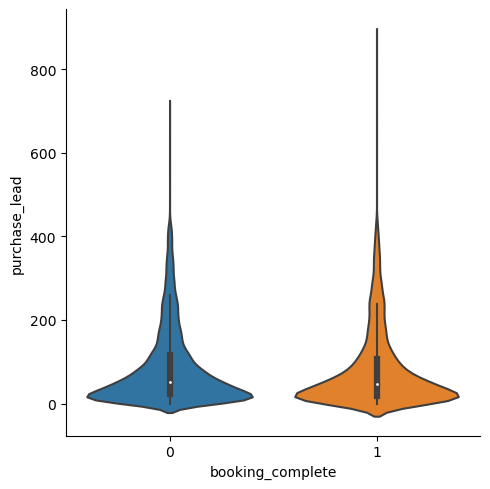

<Figure size 1500x1000 with 0 Axes>

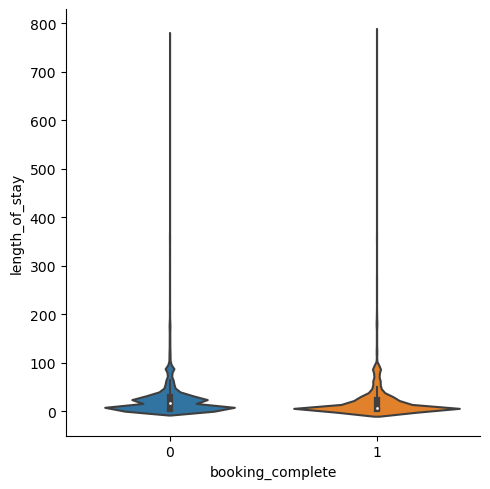

<Figure size 1500x1000 with 0 Axes>

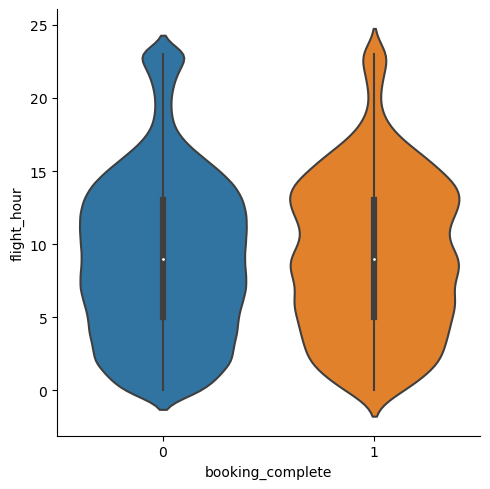

<Figure size 1500x1000 with 0 Axes>

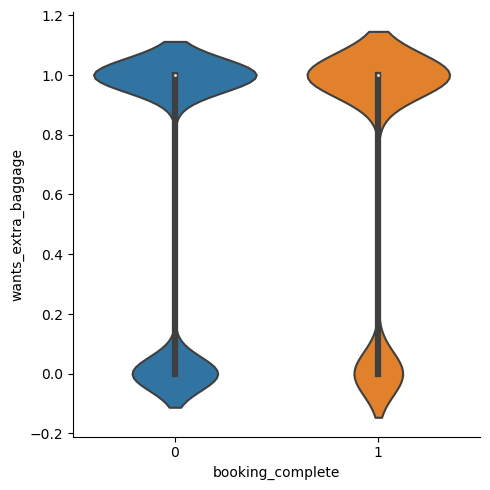

<Figure size 1500x1000 with 0 Axes>

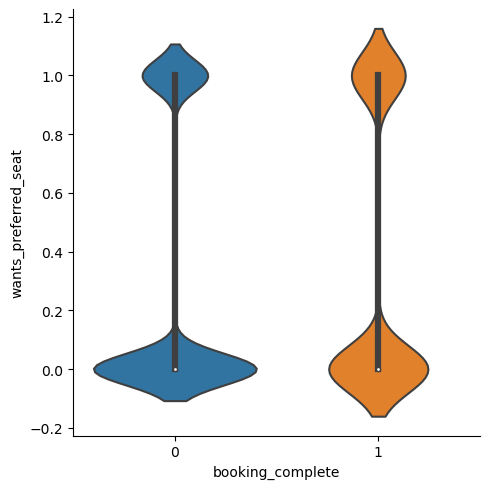

<Figure size 1500x1000 with 0 Axes>

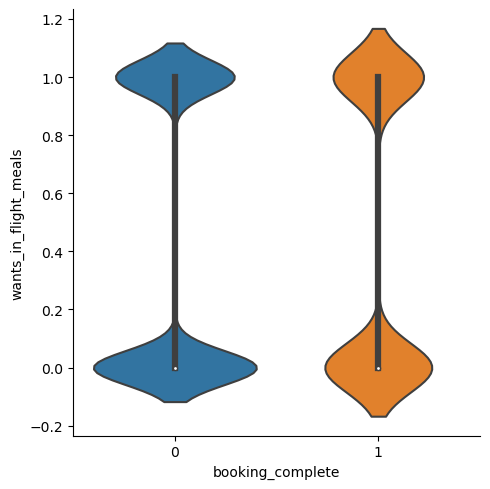

<Figure size 1500x1000 with 0 Axes>

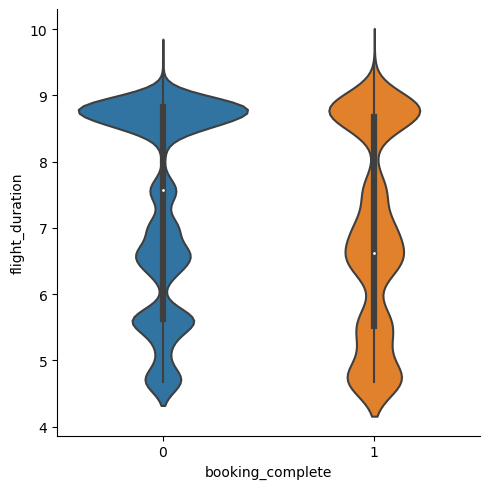

<Figure size 1500x1000 with 0 Axes>

In [85]:
for col in numeric_col:
    if col!='booking_complete':
        sns.catplot(data=df,x='booking_complete',y=col,kind='violin')
        plt.figure(figsize=(15,10))

C:\Users\himan\AppData\Local\Temp\ipykernel_10500\1089426906.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\AppData\Local\Temp\ipykernel_10500\1089426906.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or 

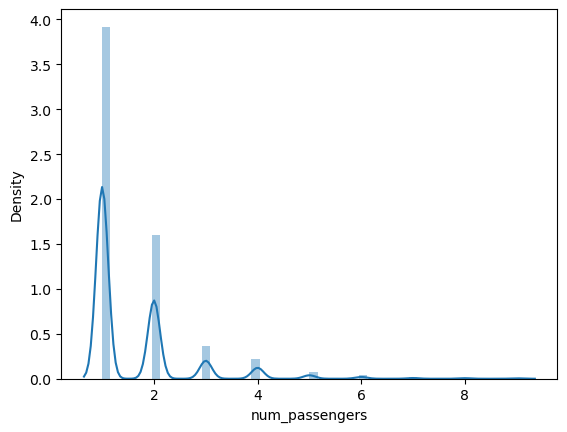

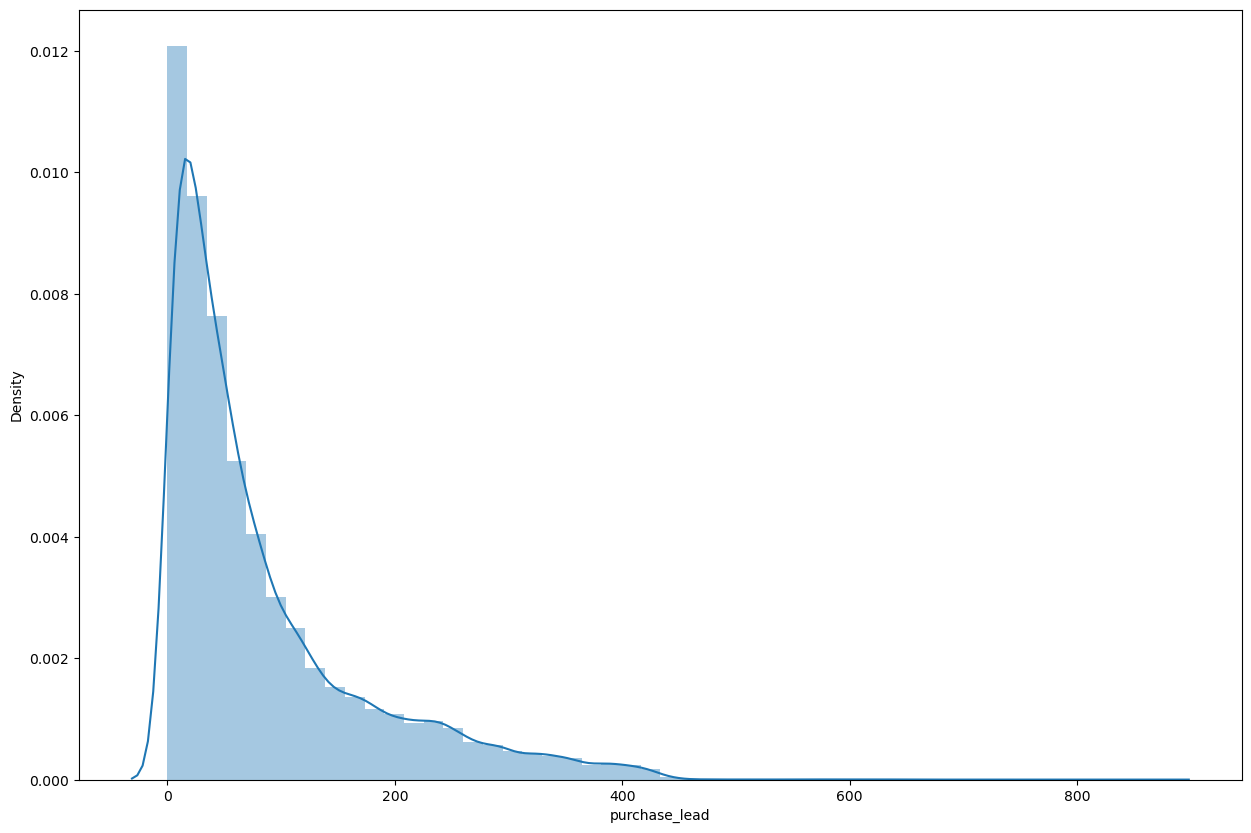

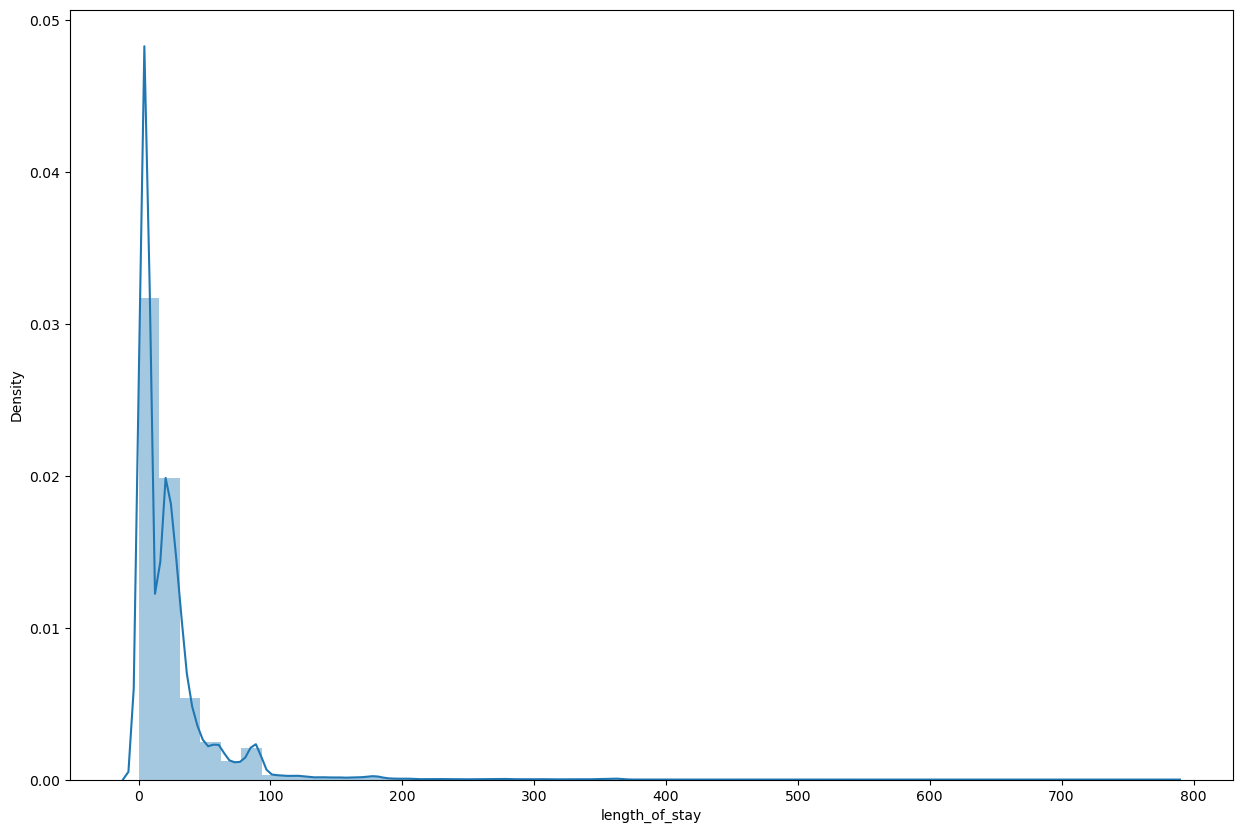

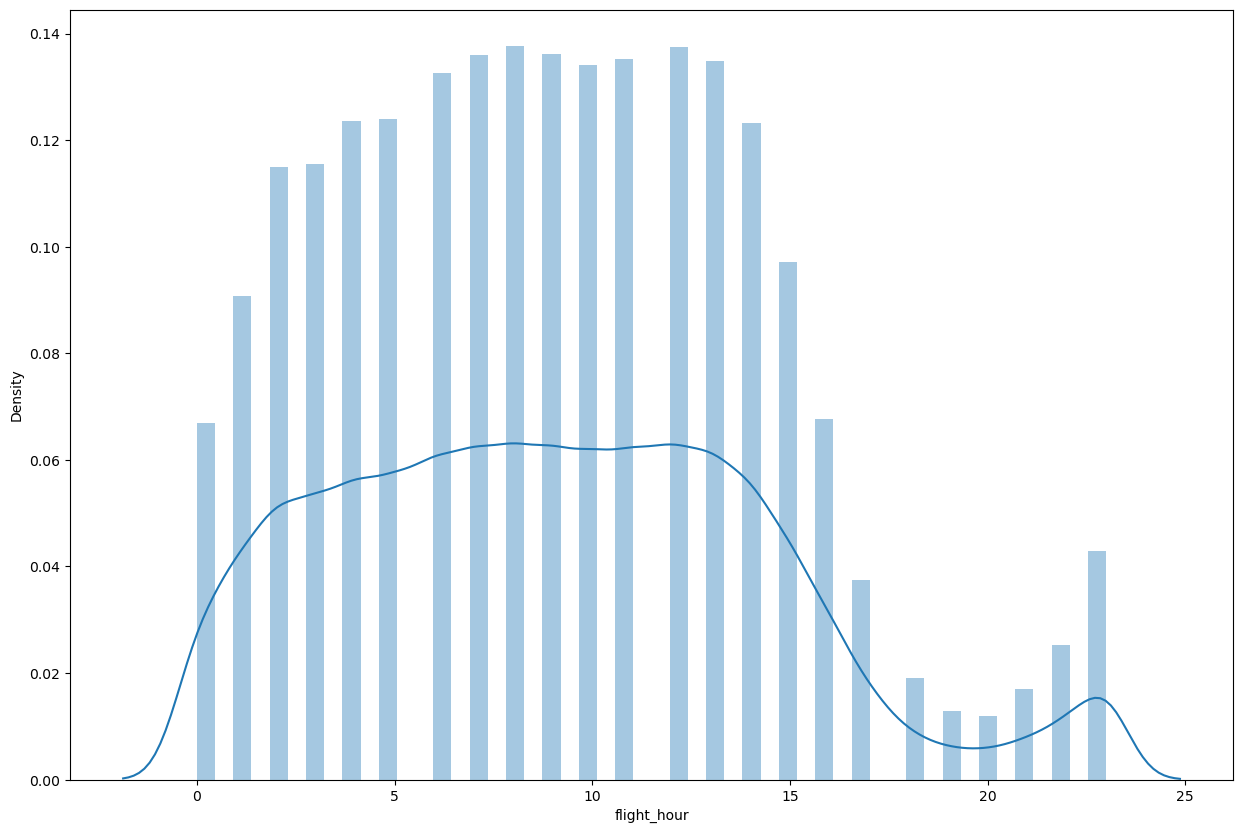

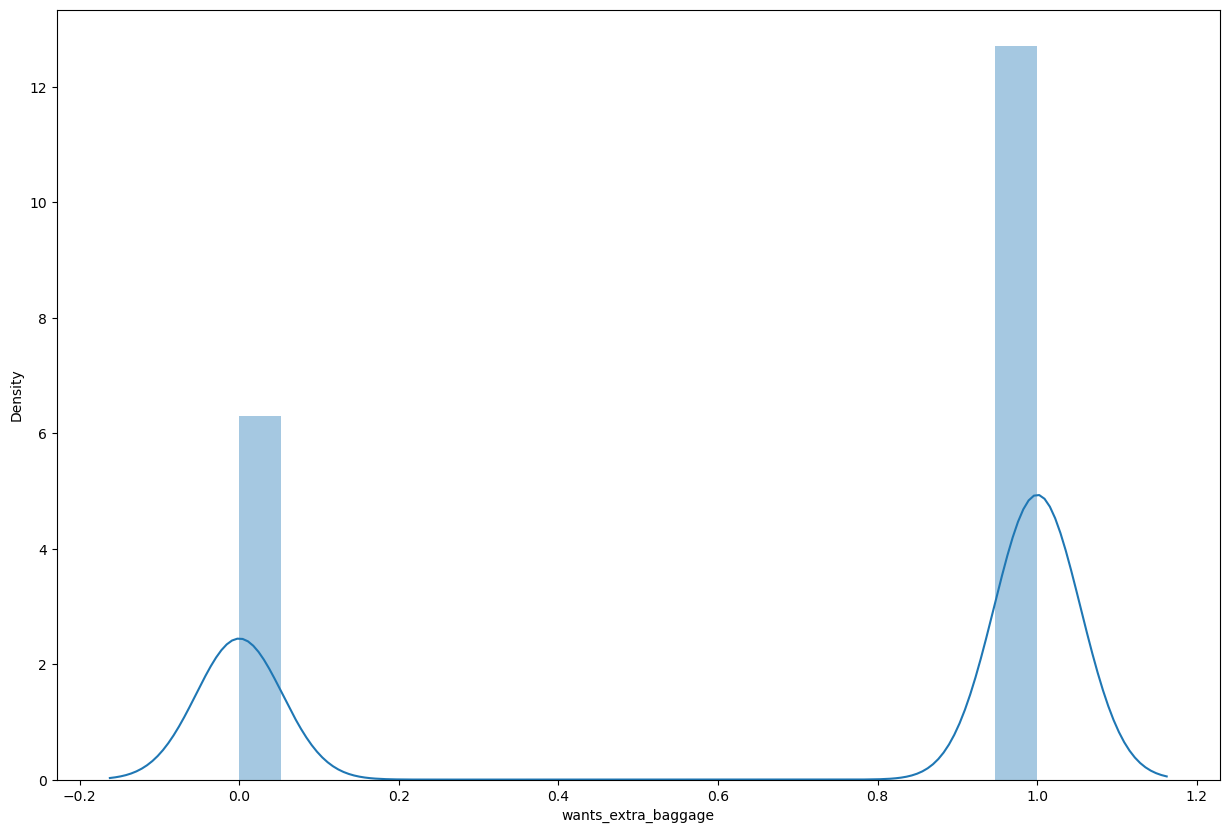

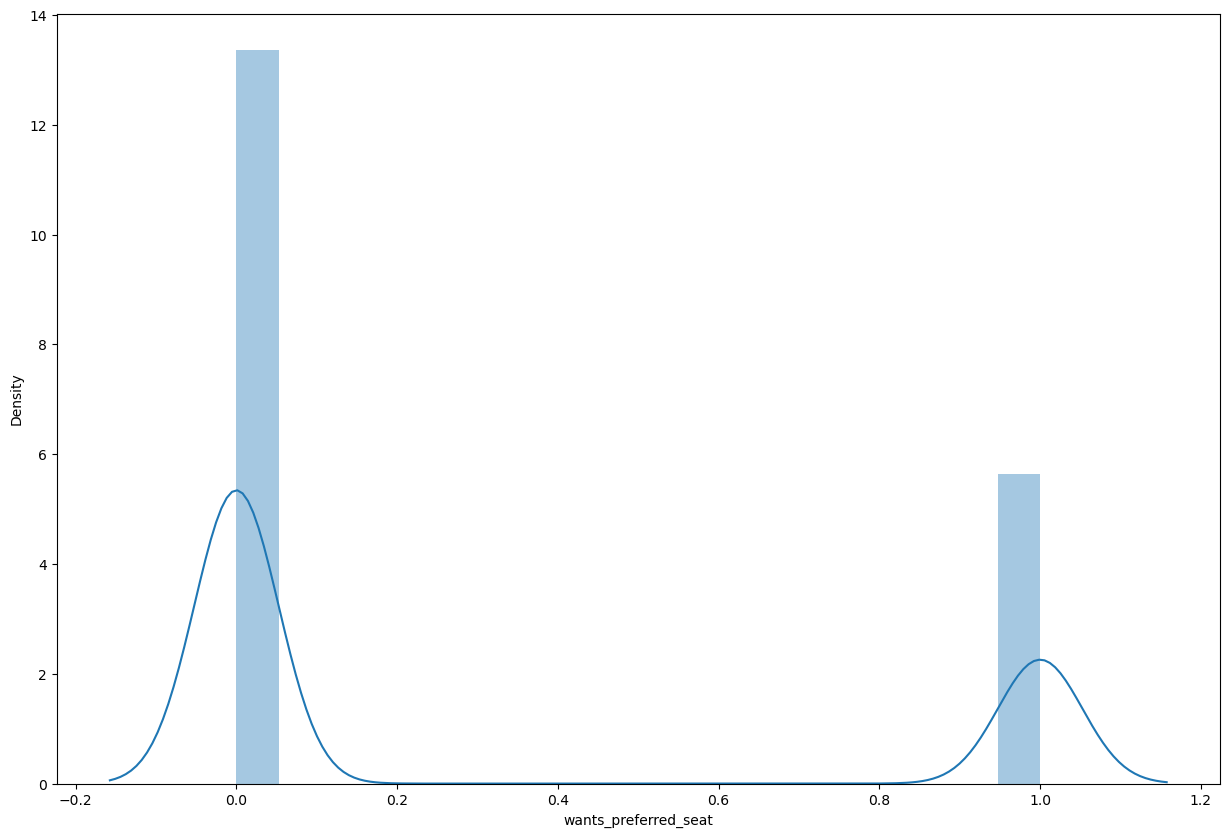

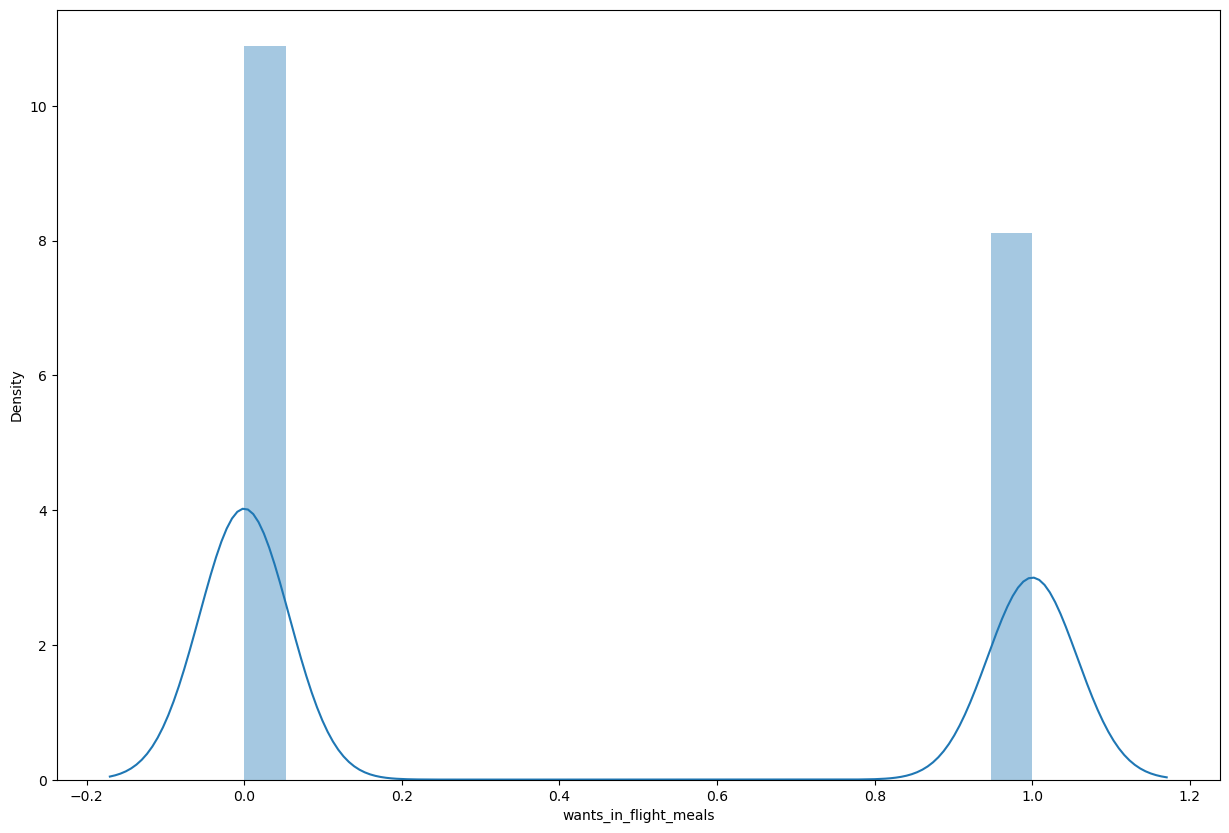

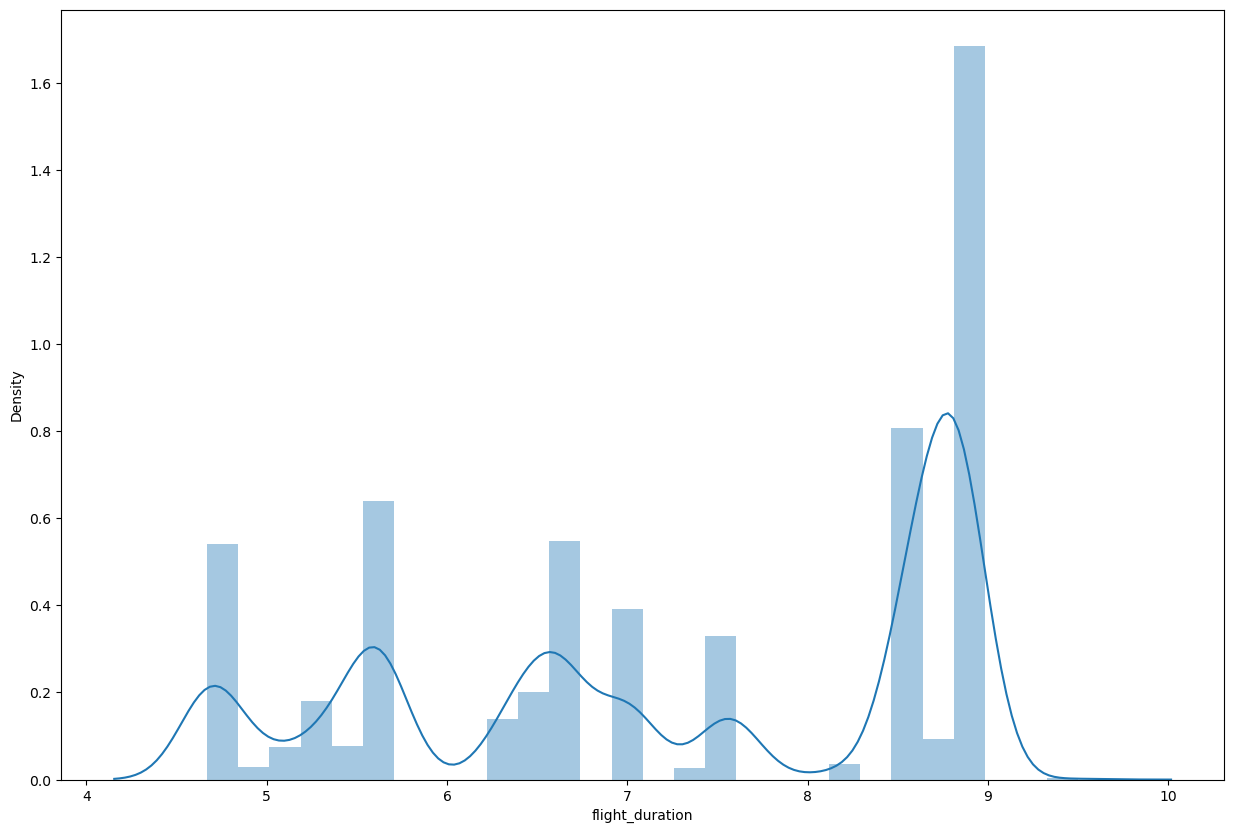

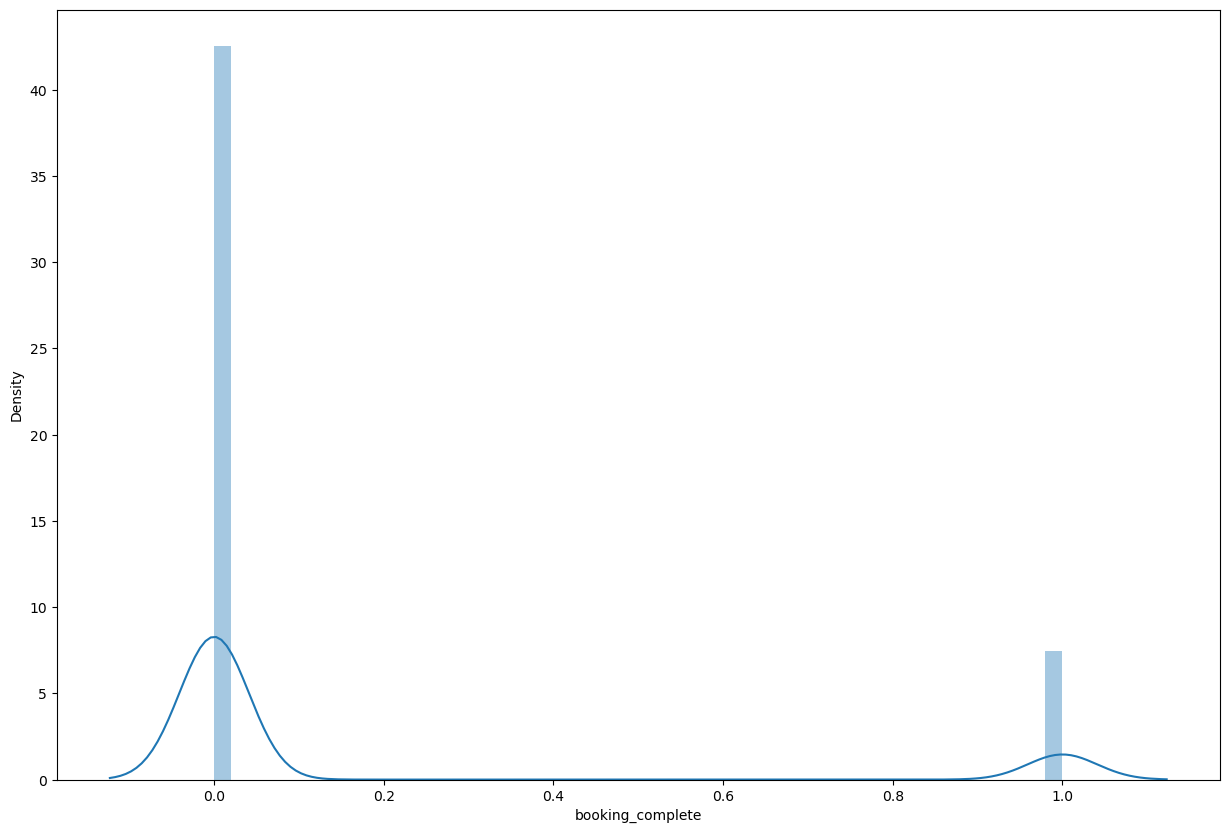

<Figure size 1500x1000 with 0 Axes>

In [86]:
for col in numeric_col:
    sns.distplot(df[col])
    plt.figure(figsize=(15,10))

In [87]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [88]:
df['length_of_stay']=np.log(df['length_of_stay'])


C:\Users\himan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [89]:
df=df[df['length_of_stay']>0]


C:\Users\himan\AppData\Local\Temp\ipykernel_10500\3225561888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['length_of_stay'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='length_of_stay', ylabel='Density'>

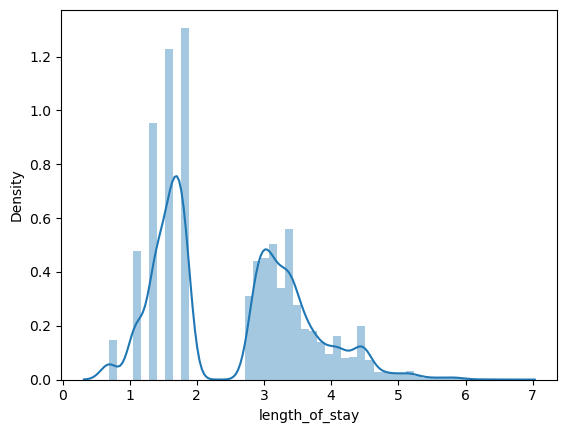

In [90]:
sns.distplot(df['length_of_stay'])

In [91]:
df['purchase_lead']=np.log(df['purchase_lead'])

C:\Users\himan\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himan\AppData\Local\Temp\ipykernel_10500\4203369707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['purchase_lead']=np.log(df['purchase_lead'])


In [92]:
df=df[df['purchase_lead']>0]


C:\Users\himan\AppData\Local\Temp\ipykernel_10500\1154048431.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['purchase_lead'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='purchase_lead', ylabel='Density'>

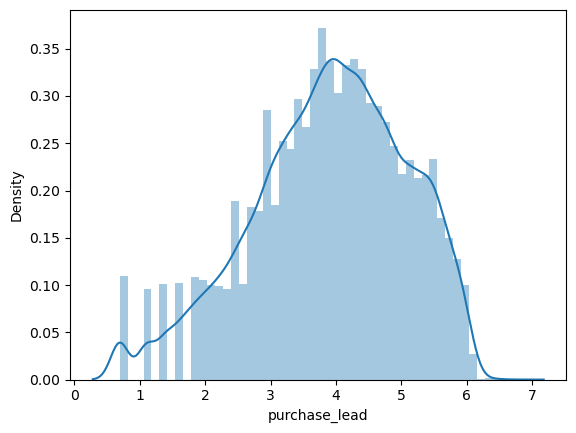

In [93]:
sns.distplot(df['purchase_lead'])

In [94]:
df['num_passengers']=np.sqrt(df['num_passengers'])


In [95]:
df=df[df['num_passengers']>0]


C:\Users\himan\AppData\Local\Temp\ipykernel_10500\915560617.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_passengers'])
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_passengers', ylabel='Density'>

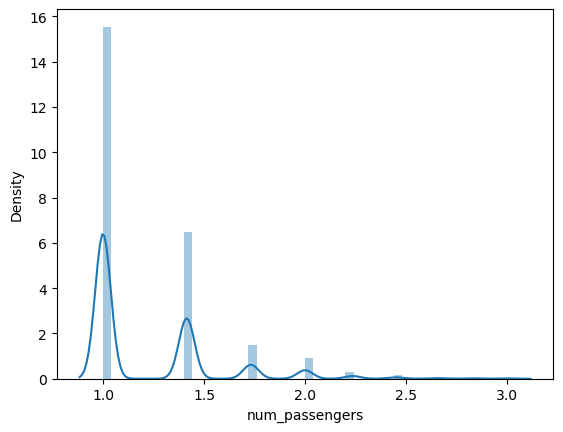

In [96]:
sns.distplot(df['num_passengers'])

In [97]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1.414214,Internet,RoundTrip,5.568345,2.944439,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1.000000,Internet,RoundTrip,4.718499,2.995732,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,1.414214,Internet,RoundTrip,5.493061,3.091042,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1.000000,Internet,RoundTrip,4.564348,3.433987,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,1.414214,Internet,RoundTrip,4.219508,3.091042,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.414214,Internet,RoundTrip,3.295837,1.791759,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1.000000,Internet,RoundTrip,4.709530,1.791759,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1.000000,Internet,RoundTrip,3.178054,1.791759,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1.000000,Internet,RoundTrip,2.708050,1.791759,11,Mon,PERPNH,Australia,1,0,1,5.62,0


C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

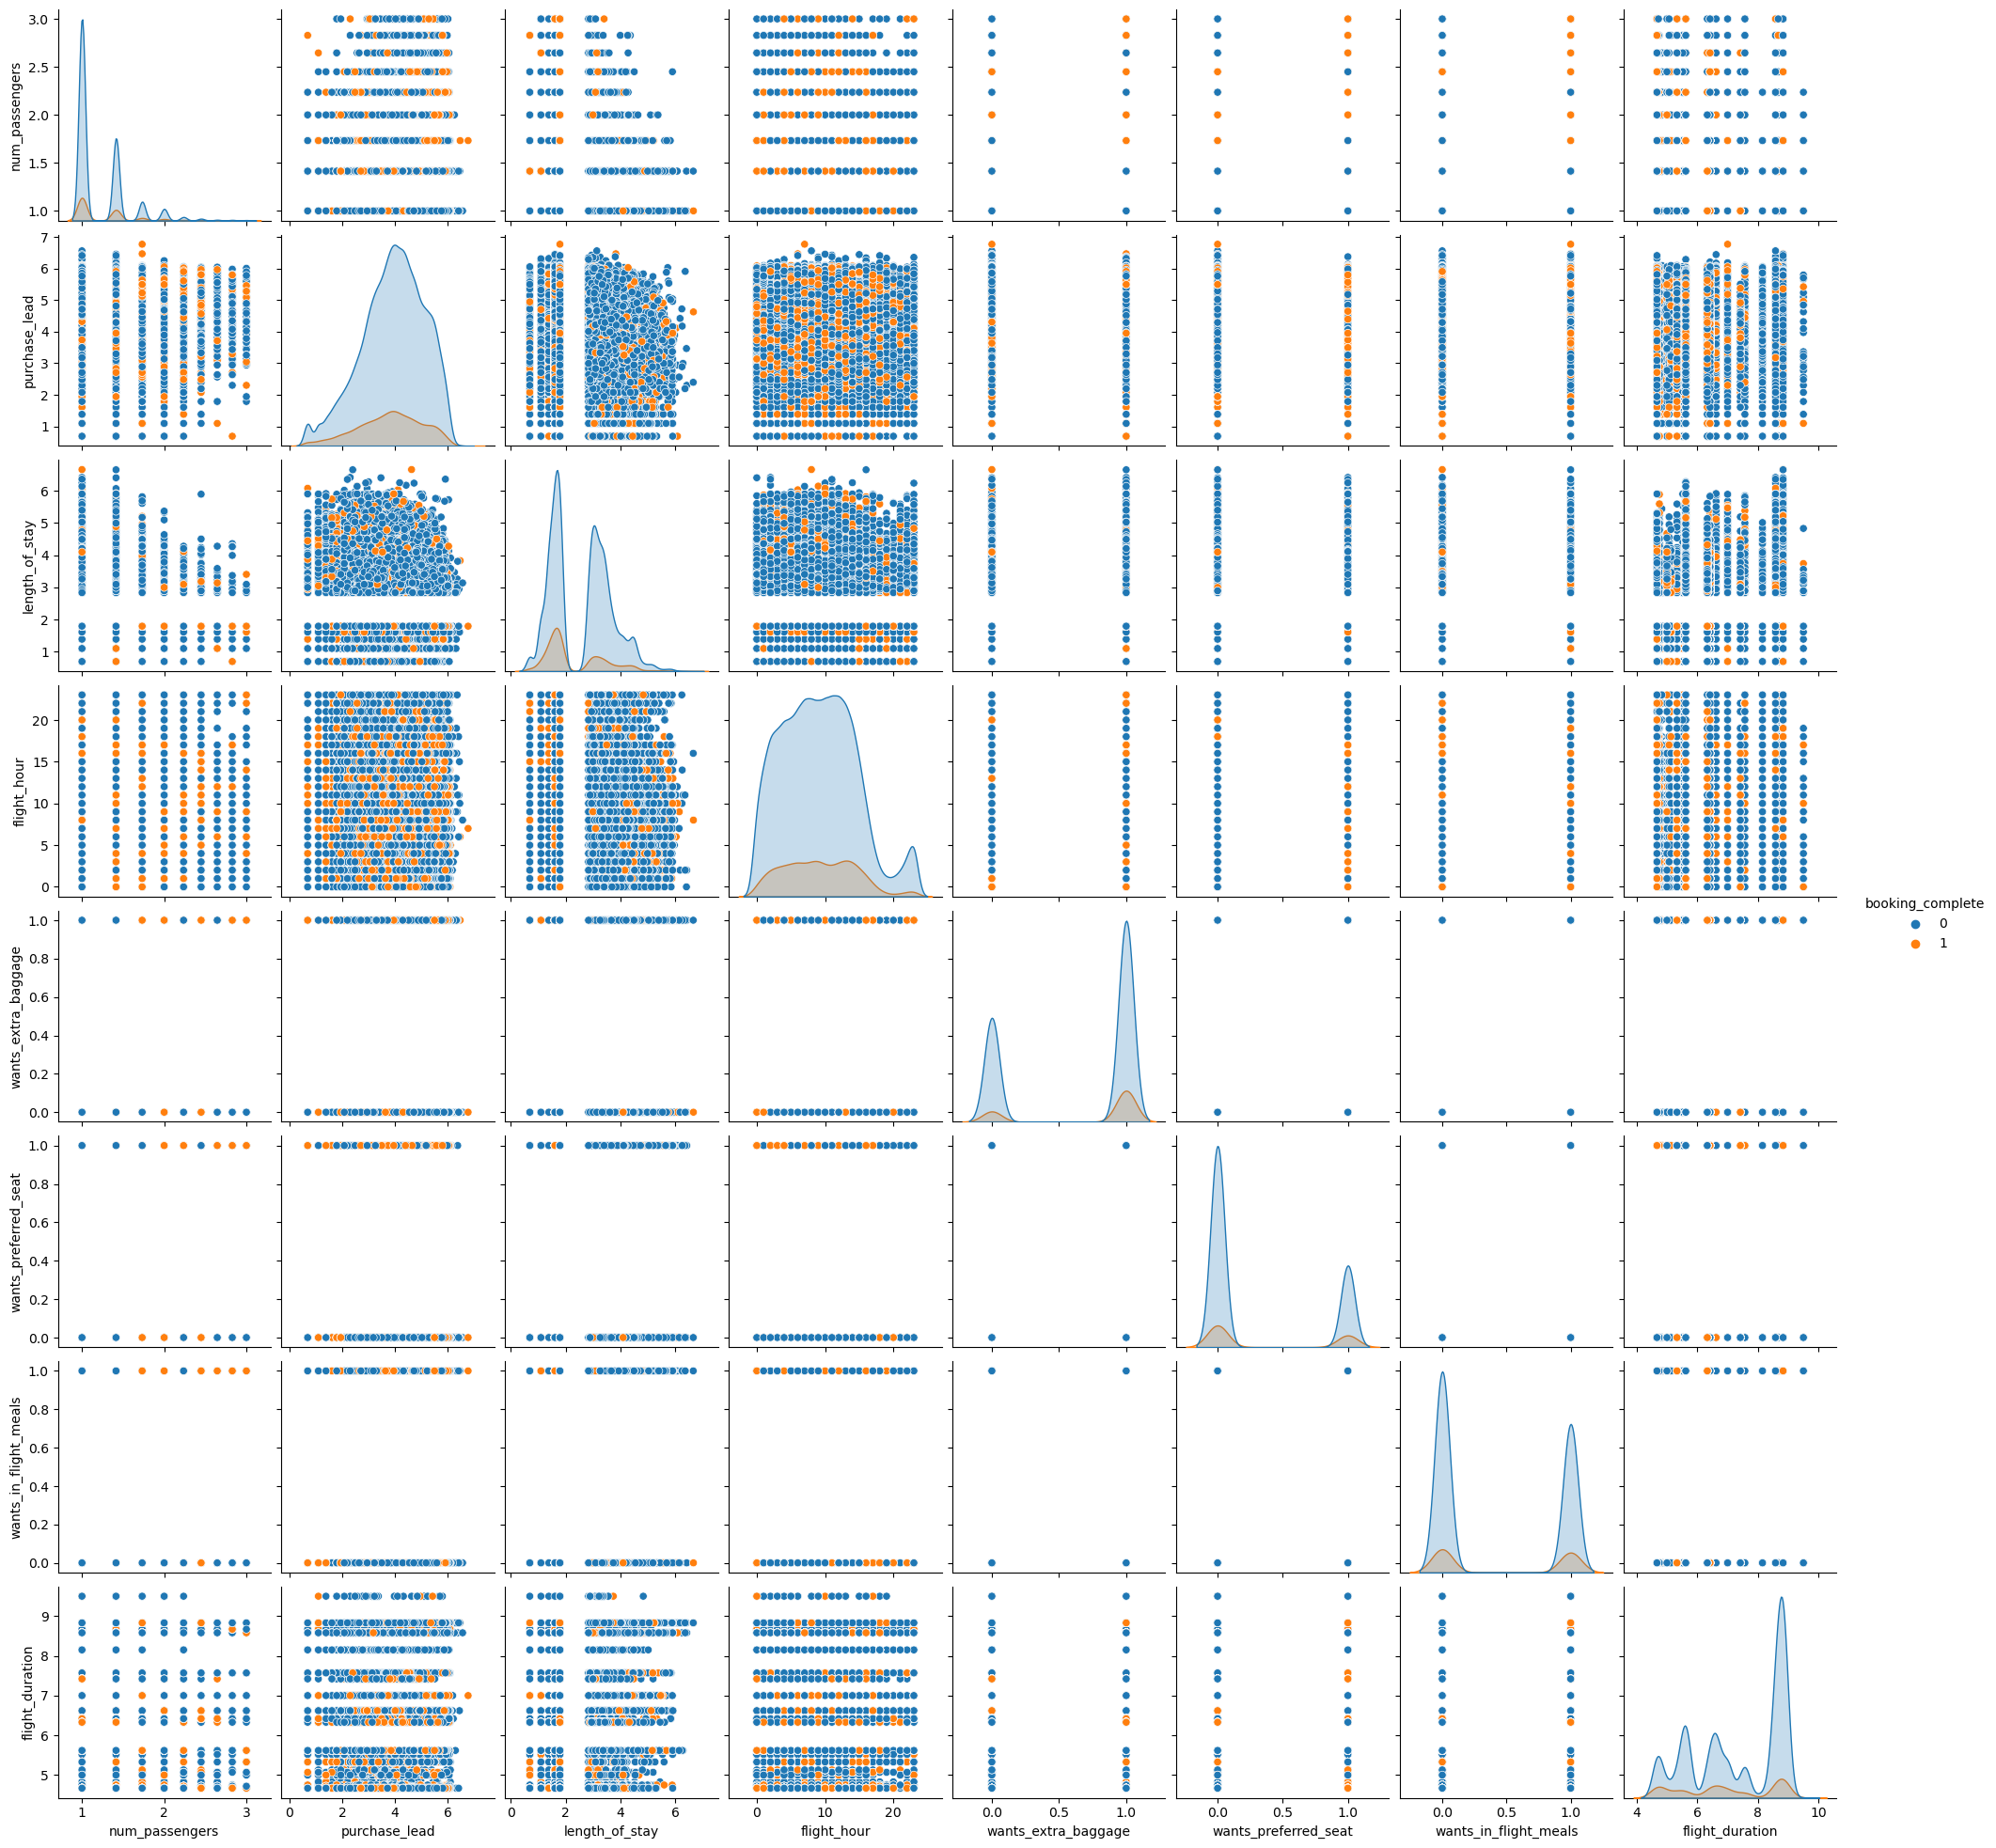

In [98]:
sns.pairplot(data=df,hue='booking_complete')

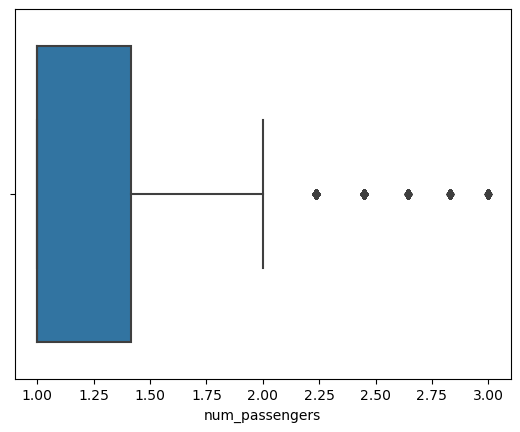

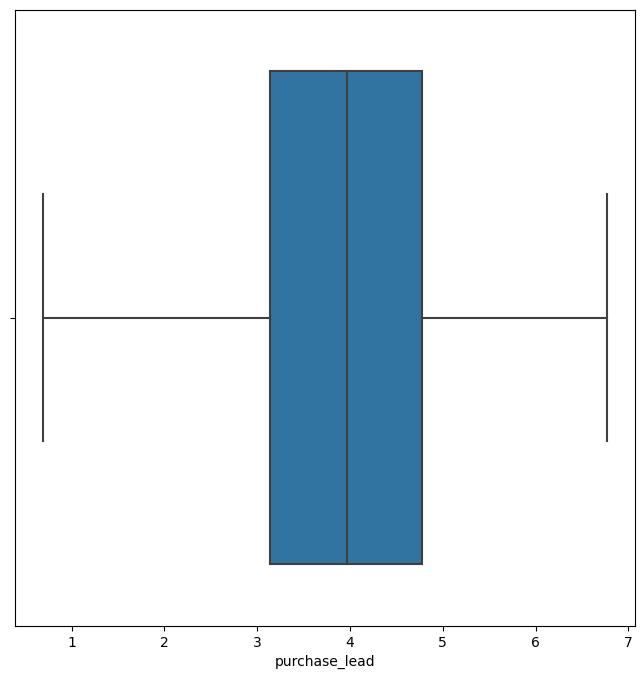

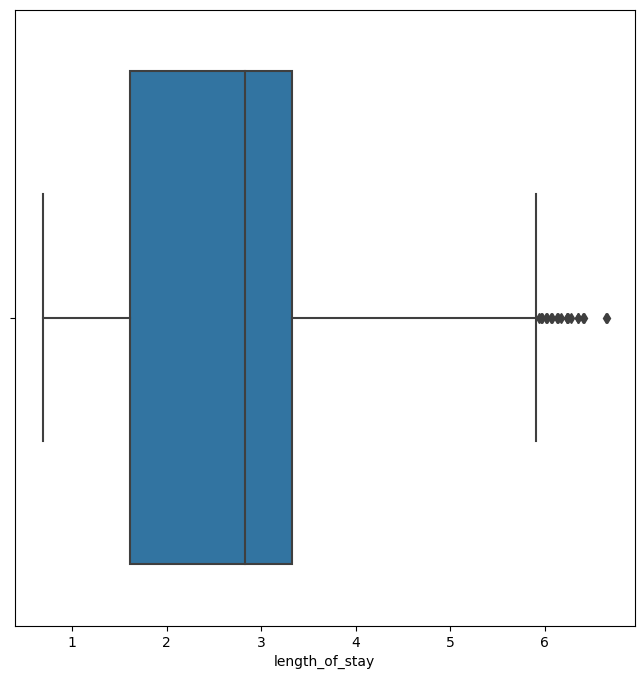

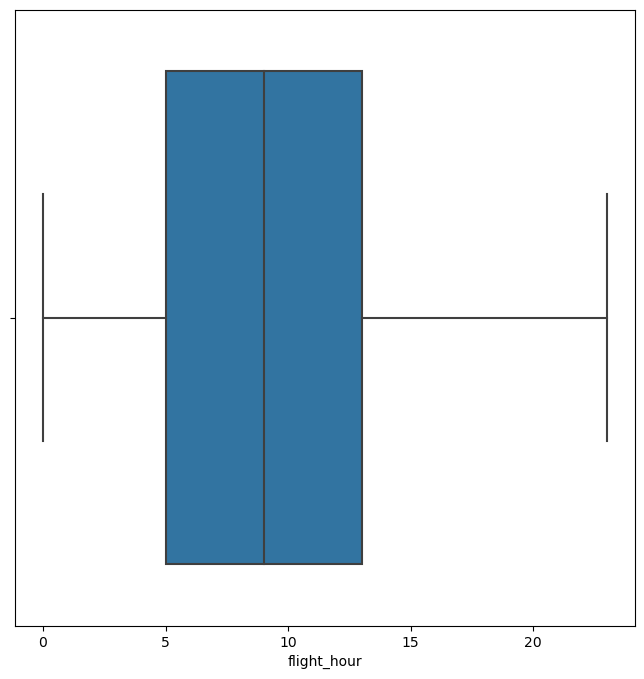

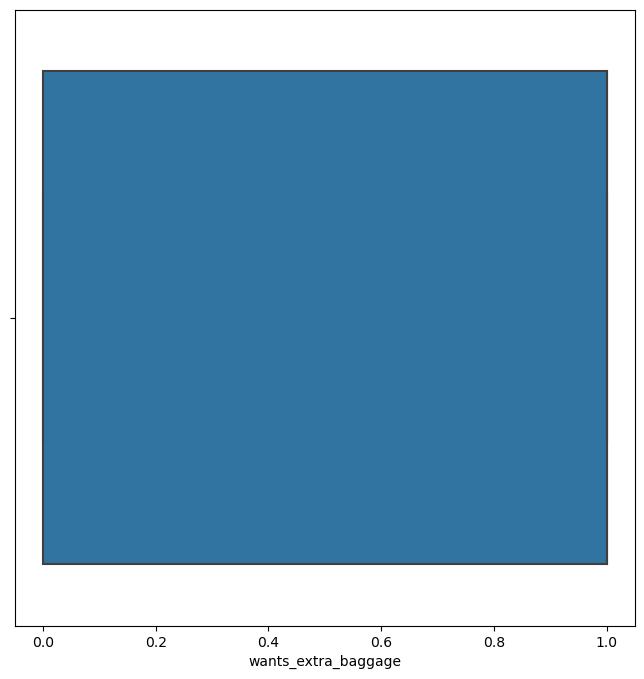

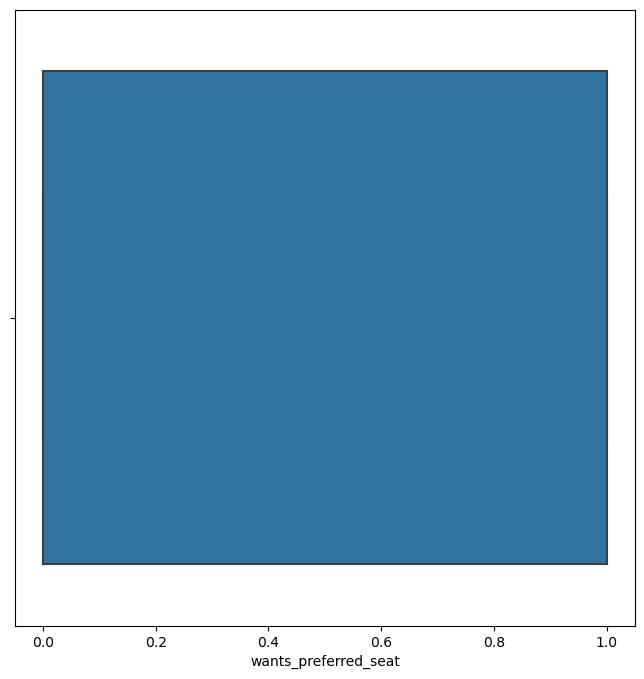

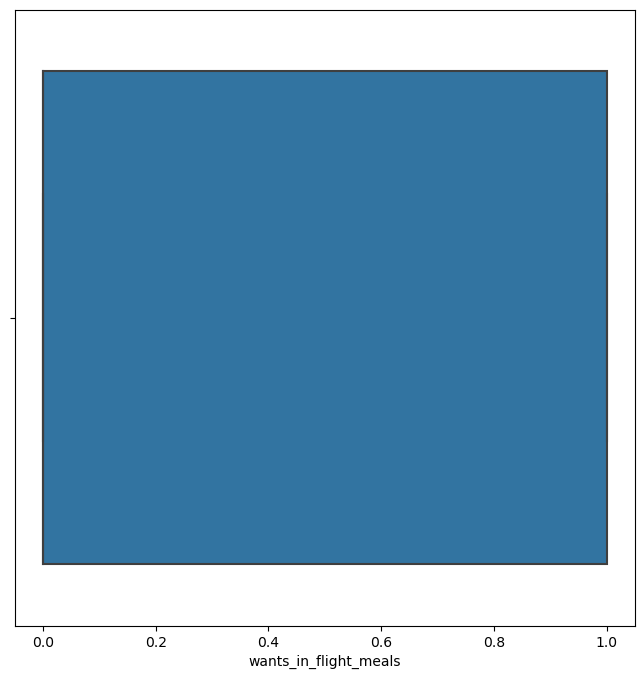

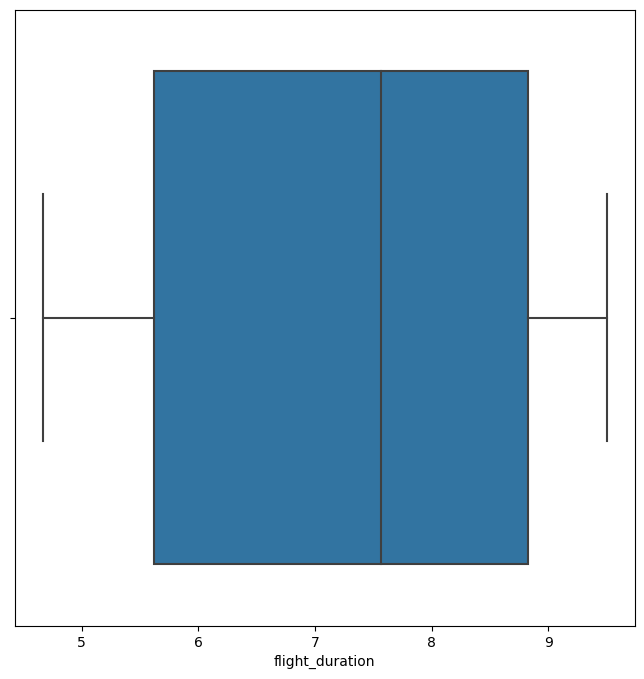

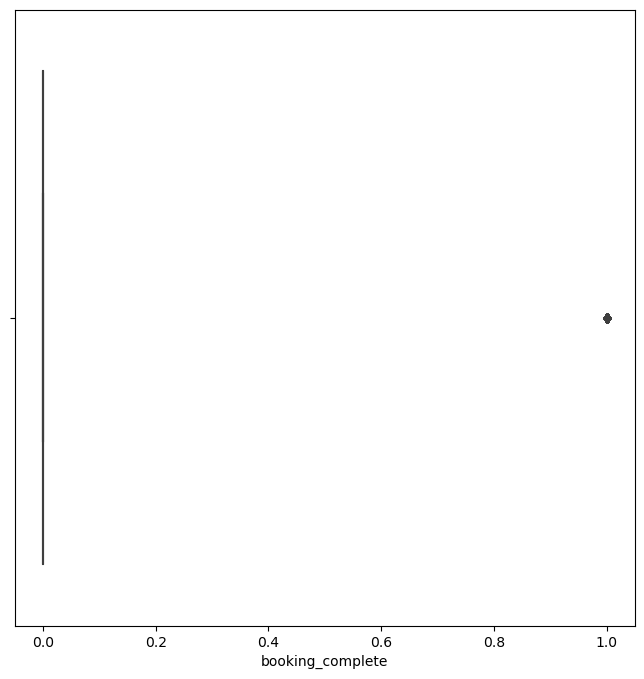

<Figure size 800x800 with 0 Axes>

In [99]:
for col in numeric_col:
    sns.boxplot(x=df[col])
    plt.figure(figsize=(8,8))

In [100]:
def remove_outliers(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Ensure we process only numeric columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filtering the data for outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


In [101]:
df_clean = remove_outliers(df)


In [102]:
df_clean

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1.414214,Internet,RoundTrip,5.568345,2.944439,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1.000000,Internet,RoundTrip,4.718499,2.995732,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,1.414214,Internet,RoundTrip,5.493061,3.091042,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1.000000,Internet,RoundTrip,4.564348,3.433987,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,1.414214,Internet,RoundTrip,4.219508,3.091042,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.414214,Internet,RoundTrip,3.295837,1.791759,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1.000000,Internet,RoundTrip,4.709530,1.791759,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1.000000,Internet,RoundTrip,3.178054,1.791759,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1.000000,Internet,RoundTrip,2.708050,1.791759,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [103]:
le=LabelEncoder()

In [104]:
for col in df_clean.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])
        
        

In [105]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1.414214,0,2,5.568345,2.944439,7,2,0,60,1,0,0,5.52,0
1,1.000000,0,2,4.718499,2.995732,3,2,0,60,0,0,0,5.52,0
2,1.414214,0,2,5.493061,3.091042,17,6,0,35,1,1,0,5.52,0
3,1.000000,0,2,4.564348,3.433987,4,2,0,60,0,0,1,5.52,0
4,1.414214,0,2,4.219508,3.091042,15,6,0,35,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1.414214,0,2,3.295837,1.791759,9,2,718,4,1,0,1,5.62,0
49996,1.000000,0,2,4.709530,1.791759,4,3,718,4,0,0,0,5.62,0
49997,1.000000,0,2,3.178054,1.791759,22,2,718,4,0,0,1,5.62,0
49998,1.000000,0,2,2.708050,1.791759,11,1,718,4,1,0,1,5.62,0


In [106]:
X=df.drop("booking_complete",axis=1)

In [107]:
y=df['booking_complete']

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
smote=SMOTE(sampling_strategy='minority')


In [110]:
X,y=smote.fit_resample(X,y)

In [111]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [112]:
X_train.shape

(66254, 13)

In [113]:
y_train.shape

(66254,)

In [114]:
X_test.shape

(16564, 13)

In [115]:
y_test.shape

(16564,)

In [116]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,1.414214,0,2,5.568345,2.944439,7,2,0,60,1,0,0,5.52
1,1.000000,0,2,4.718499,2.995732,3,2,0,60,0,0,0,5.52
2,1.414214,0,2,5.493061,3.091042,17,6,0,35,1,1,0,5.52
3,1.000000,0,2,4.564348,3.433987,4,2,0,60,0,0,1,5.52
4,1.414214,0,2,4.219508,3.091042,15,6,0,35,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82813,1.000000,0,2,3.068398,4.275273,4,6,575,50,1,0,0,4.75
82814,1.000000,0,2,1.945910,2.974176,16,5,92,88,1,0,1,8.83
82815,1.074992,0,2,3.431148,3.401197,5,0,469,50,1,0,0,4.75
82816,1.414214,0,2,5.183852,1.468243,4,1,287,92,1,0,0,7.00


In [117]:
y

0        0
1        0
2        0
3        0
4        0
        ..
82813    1
82814    1
82815    1
82816    1
82817    1
Name: booking_complete, Length: 82818, dtype: int64

In [118]:
rfc=RandomForestClassifier()


In [119]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [120]:
y_pred=rfc.predict(X_test)


In [122]:
accuracy_score(y_test,y_pred)

0.9002052644288819

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      8243
           1       0.92      0.88      0.90      8321

    accuracy                           0.90     16564
   macro avg       0.90      0.90      0.90     16564
weighted avg       0.90      0.90      0.90     16564



In [125]:
cm=confusion_matrix(y_test,y_pred)

In [126]:
cm

array([[7611,  632],
       [1021, 7300]], dtype=int64)

<Axes: >

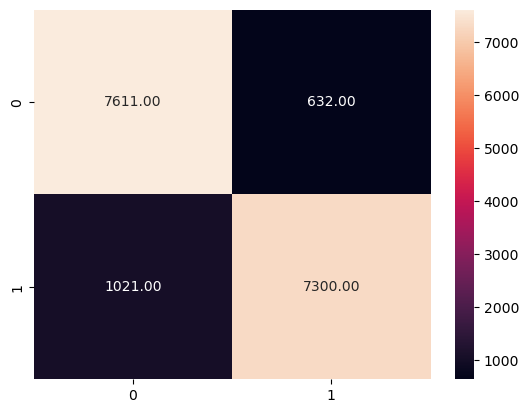

In [132]:
sns.heatmap(cm,annot=True,fmt="1.2f")